#### 경사하강법(Gradient Descent) 시각화

모듈 불러오기

In [1]:
import numpy as np
from numpy import ndarray
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from utils import *
%matplotlib notebook

데이터 불러오기

In [2]:
with open("data.csv", "r") as f:
    data = pd.read_csv(f)
x = data['km'].to_numpy().reshape((-1, 1))
y = data['price'].to_numpy().reshape((-1, 1))
m = x.shape[0]
x_prime = add_intercept(minmax(x))
x_prime_T = x_prime.T
plt.ion()

### 1. BGD(Batch Gradient Descent)

<IPython.core.display.Javascript object>


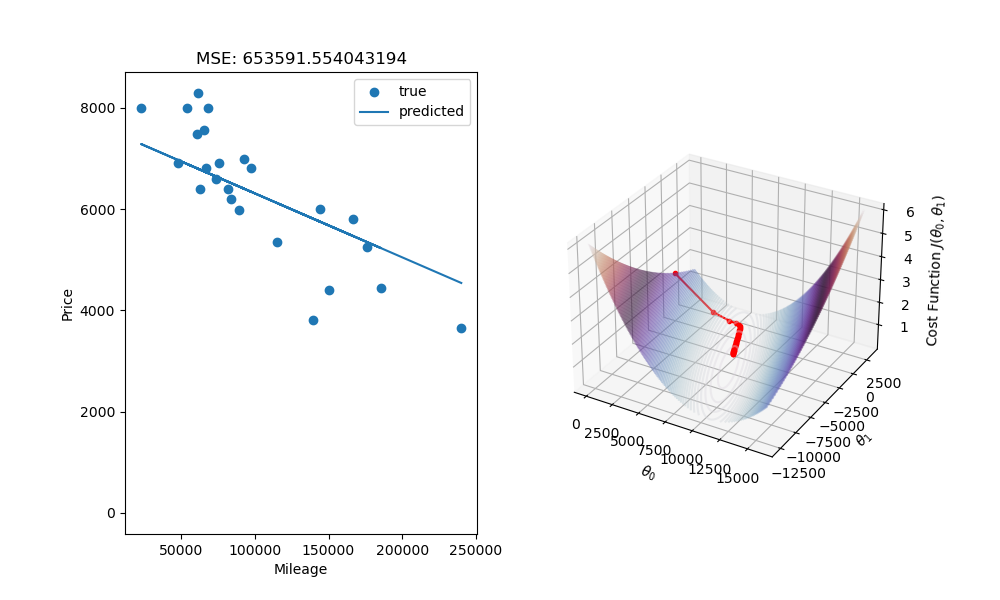

In [3]:
# Initialize weights
theta = np.zeros((2, 1))
y_hat = x_prime.dot(theta)
# draw
fig, ax2, ax3, line2, line3 = draw(x, x_prime_T, y, y_hat, m)
for _ in range(50):
    gradient = x_prime_T.dot(y_hat - y) / m
    theta -= 0.5 * gradient
    y_hat = x_prime.dot(theta)
    # draw
    draw2(x, y, y_hat, theta, fig, ax2, line2, line3)
plt.show()


### 2. SGD(Stochastic Gradient Descent)

<IPython.core.display.Javascript object>


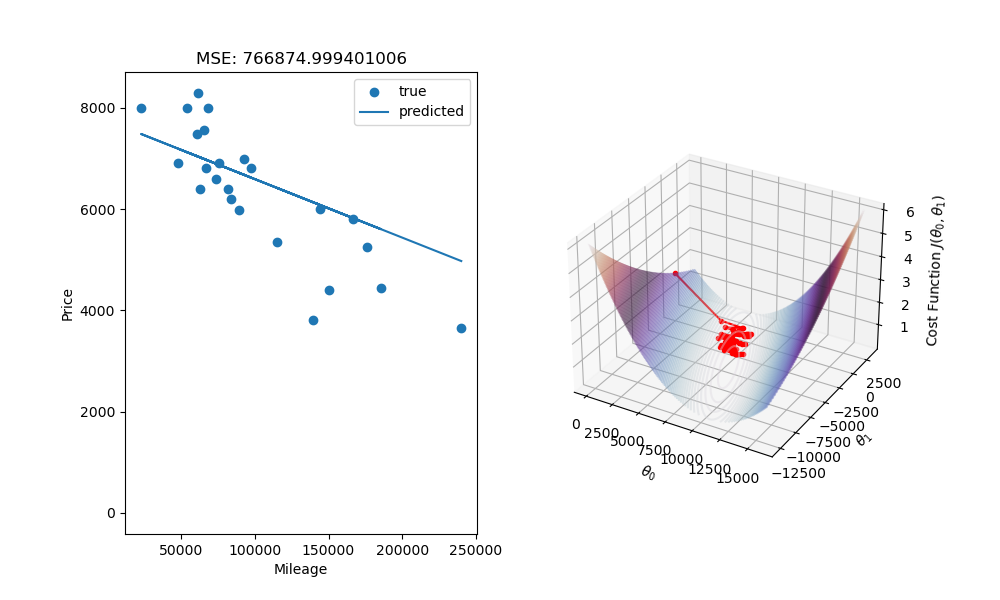

In [4]:
# Initialize weights
theta = np.zeros((2, 1))
y_hat = x_prime.dot(theta)
# draw
fig, ax2, ax3, line2, line3 = draw(x, x_prime_T, y, y_hat, m)
for _ in range(50 // m):
    indices = np.random.permutation(m)
    x_shuffled = x_prime[indices]
    y_shuffled = y[indices]
    for x_i, y_i in zip(x_shuffled, y_shuffled):
        y_pred = np.dot(x_i, theta)
        gradient = (x_i * (y_pred - y_i)).reshape((-1, 1))
        theta -= 0.5 * gradient
        
        # draw
        y_hat = x_prime.dot(theta)
        draw2(x, y, y_hat, theta, fig, ax2, line2, line3)
    


### 3. MGD(Mini-batch Gradient Descent)

<IPython.core.display.Javascript object>


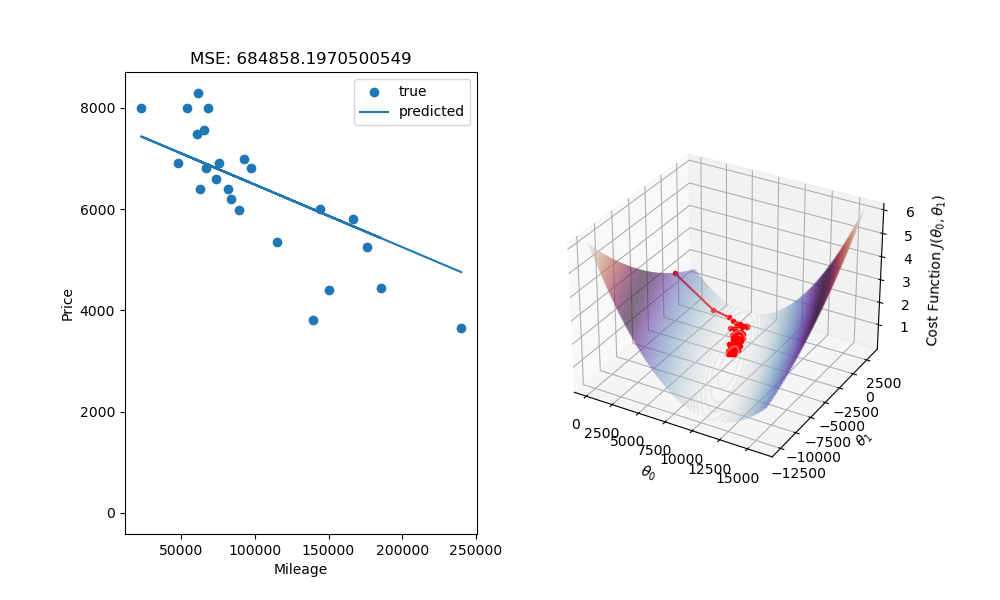

In [5]:
# Initialize weights
theta = np.zeros((2, 1))
y_hat = x_prime.dot(theta)
# draw
fig, ax2, ax3, line2, line3 = draw(x, x_prime_T, y, y_hat, m)

batch_size = 4
num_batches = m // batch_size
for _ in range(50 // num_batches):
    indices = np.random.permutation(m)
    x_shuffled = x_prime[indices]
    y_shuffled = y[indices]
    for batch in range(num_batches):
        s = batch * batch_size
        e = s + batch_size
        x_i = x_shuffled[s:e]
        y_i = y_shuffled[s:e]
        
        y_pred = np.dot(x_i, theta)
        gradient = x_i.T.dot(y_pred - y_i) / batch_size
        theta -= 0.5 * gradient
        
        # draw
        y_hat = x_prime.dot(theta)
        draw2(x, y, y_hat, theta, fig, ax2, line2, line3)
    


### 4.Momentum

<IPython.core.display.Javascript object>


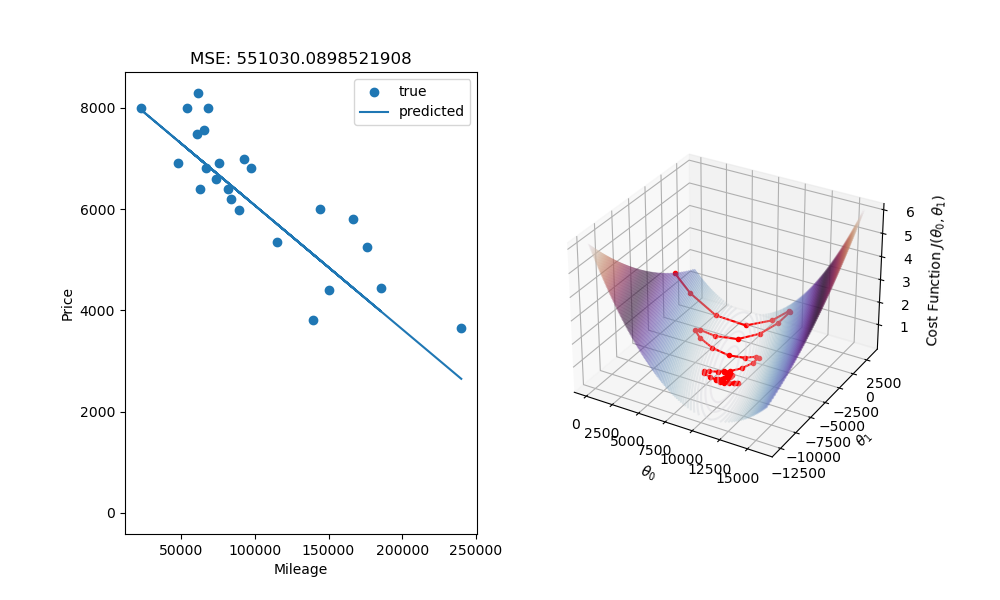

In [6]:
# Initialize weights
theta = np.zeros((2, 1))
y_hat = x_prime.dot(theta)
# draw
fig, ax2, ax3, line2, line3 = draw(x, x_prime_T, y, y_hat, m)

batch_size = 4
num_batches = m // batch_size
v = np.zeros_like(theta)
momentum = 0.9
for _ in range(50 // num_batches):
    indices = np.random.permutation(m)
    x_shuffled = x_prime[indices]
    y_shuffled = y[indices]
    for batch in range(num_batches):
        s = batch * batch_size
        e = s + batch_size
        x_i = x_shuffled[s:e]
        y_i = y_shuffled[s:e]
        
        y_pred = np.dot(x_i, theta)
        gradient = x_i.T.dot(y_pred - y_i) / batch_size
        v = momentum * v - 0.2 * gradient
        theta += v
        
        # draw
        y_hat = x_prime.dot(theta)
        draw2(x, y, y_hat, theta, fig, ax2, line2, line3)
    


### 5.Adagrad

<IPython.core.display.Javascript object>


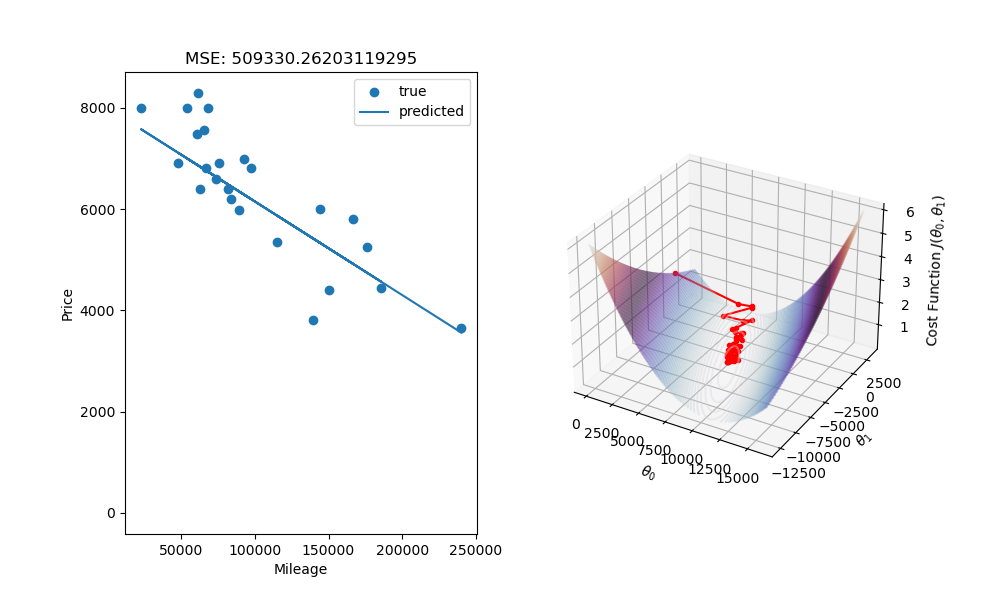

In [7]:
# Initialize weights
theta = np.zeros((2, 1))
y_hat = x_prime.dot(theta)
# draw
fig, ax2, ax3, line2, line3 = draw(x, x_prime_T, y, y_hat, m)

batch_size = 4
num_batches = m // batch_size
grad_squared_sum = np.zeros((2, 1))
for _ in range(50 // num_batches):
    indices = np.random.permutation(m)
    x_shuffled = x_prime[indices]
    y_shuffled = y[indices]
    for batch in range(num_batches):
        s = batch * batch_size
        e = s + batch_size
        x_i = x_shuffled[s:e]
        y_i = y_shuffled[s:e]
        
        y_pred = np.dot(x_i, theta)
        gradient = x_i.T.dot(y_pred - y_i)
        grad_squared_sum += gradient**2
        adjusted_gradient = 4000 * gradient / (np.sqrt(grad_squared_sum) + 1e-8)
        theta -= adjusted_gradient
        
        # draw
        y_hat = x_prime.dot(theta)
        draw2(x, y, y_hat, theta, fig, ax2, line2, line3)

### 6.RMSprop

<IPython.core.display.Javascript object>


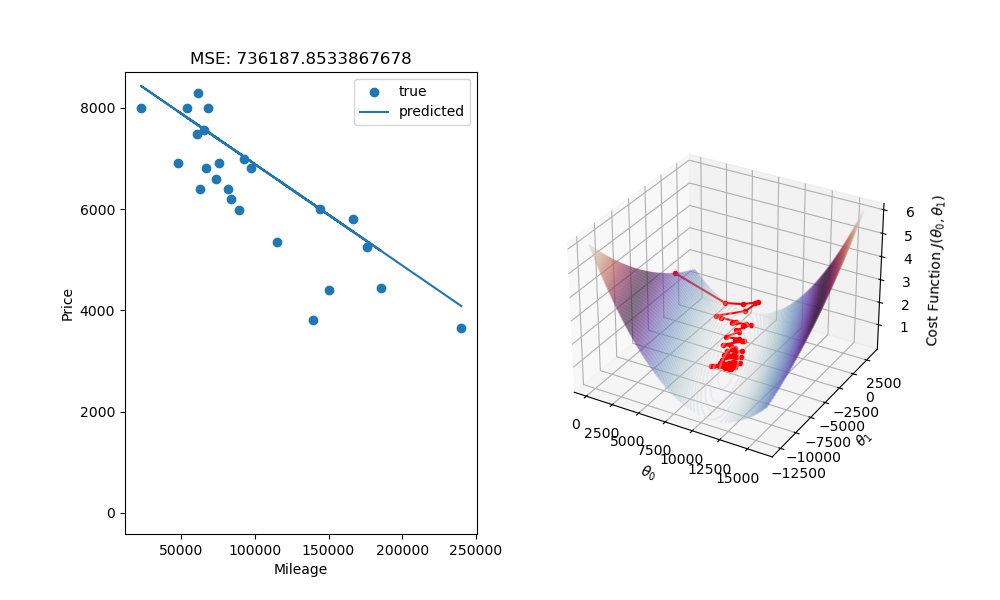

In [8]:
# Initialize weights
theta = np.zeros((2, 1))
y_hat = x_prime.dot(theta)
# draw
fig, ax2, ax3, line2, line3 = draw(x, x_prime_T, y, y_hat, m)

batch_size = 4
num_batches = m // batch_size
cache = np.zeros((2, 1))
beta = 0.9
for _ in range(50 // num_batches):
    indices = np.random.permutation(m)
    x_shuffled = x_prime[indices]
    y_shuffled = y[indices]
    for batch in range(num_batches):
        s = batch * batch_size
        e = s + batch_size
        x_i = x_shuffled[s:e]
        y_i = y_shuffled[s:e]
        
        y_pred = np.dot(x_i, theta)
        gradient = x_i.T.dot(y_pred - y_i)
        cache = beta * cache + (1 - beta) * gradient**2
        adjusted_gradient = 1000 * gradient / (np.sqrt(cache) + 1e-8)
        theta -= adjusted_gradient
        
        # draw
        y_hat = x_prime.dot(theta)
        draw2(x, y, y_hat, theta, fig, ax2, line2, line3)

### 7.Adam

<IPython.core.display.Javascript object>


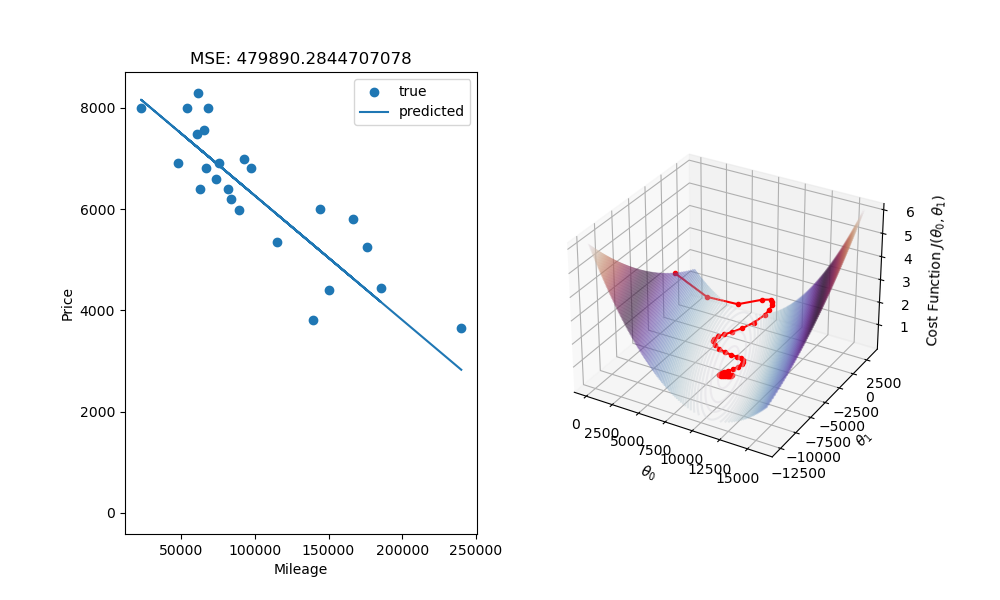

In [9]:
# Initialize weights
theta = np.zeros((2, 1))
y_hat = x_prime.dot(theta)
# draw
fig, ax2, ax3, line2, line3 = draw(x, x_prime_T, y, y_hat, m)

batch_size = 4
num_batches = m // batch_size
m1 = np.zeros((2, 1))
v = np.zeros((2, 1))
beta1 = 0.9
beta2 = 0.999
t = 0
for _ in range(50 // num_batches):
    indices = np.random.permutation(m)
    x_shuffled = x_prime[indices]
    y_shuffled = y[indices]
    for batch in range(num_batches):
        t += 1
        s = batch * batch_size
        e = s + batch_size
        x_i = x_shuffled[s:e]
        y_i = y_shuffled[s:e]
        
        y_pred = np.dot(x_i, theta)
        gradient = x_i.T.dot(y_pred - y_i)
        m1 = beta1 * m1 + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)

        m_hat = m1 / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        adjusted_gradient = 2000 * m_hat / (np.sqrt(v_hat) + 1e-8)
        theta -= adjusted_gradient
        
        # draw
        y_hat = x_prime.dot(theta)
        draw2(x, y, y_hat, theta, fig, ax2, line2, line3)